In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [ ]:
bank_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/dsaa5002_2023fall_final_datasets/Data_Q6/Bank_Customer.csv')

In [ ]:
bank_df.head()

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2002/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2002/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2002/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2002/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2002/8/16,181156,1762.5


In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984068 entries, 0 to 1048566
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            984068 non-null  object        
 1   CustomerID               984068 non-null  object        
 2   CustomerDateOfBirth      984068 non-null  datetime64[ns]
 3   CustGender               984068 non-null  object        
 4   CustLocation             984068 non-null  object        
 5   CustAccountBalance       984068 non-null  float64       
 6   TransactionDate          984068 non-null  datetime64[ns]
 7   TransactionTime          984068 non-null  int64         
 8   TransactionAmount (INR)  984068 non-null  float64       
 9   TransactionTime_new      984068 non-null  datetime64[ns]
 10  Hour                     984068 non-null  int64         
 11  YearOfBirth              984068 non-null  int64         
 12  Age            

In [ ]:
# 导入datetime库
from datetime import datetime

# 将CustomerDateOfBirth列转换为日期时间型
bank_df['CustomerDateOfBirth'] = pd.to_datetime(bank_df['CustomerDateOfBirth'], format='%d/%m/%y',errors='coerce')


In [ ]:
# 将TransactionDate列转换为日期时间型
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'], format='%Y/%m/%d',errors='coerce')

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDateOfBirth      984425 non-null   datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 79.5+ MB


In [ ]:

# 将TransactionTime列转换为日期时间类型
bank_df['TransactionTime_new'] = pd.to_datetime(bank_df['TransactionTime'], format='%H%M%S',errors='coerce')


# 打印转换后的结果
print(bank_df[['TransactionTime_new']].head())

  TransactionTime_new
0 1900-01-01 14:32:07
1 1900-01-01 14:18:58
2 1900-01-01 14:27:12
3 1900-01-01 14:27:14
4 1900-01-01 18:11:56


In [ ]:
# 提取TransactionTime_new列中的小时数
bank_df['Hour'] = bank_df['TransactionTime_new'].dt.hour.astype(int)

# 打印提取的小时数
print(bank_df['Hour'].head())

0    14
1    14
2    14
3    14
4    18
Name: Hour, dtype: int64


In [ ]:
bank_df.head()

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2002-08-16,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2002-08-16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2002-08-16,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2002-08-16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2002-08-16,181156,1762.5


In [ ]:
bank_df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDateOfBirth        3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
# 删除包含空值的行
bank_df = bank_df.dropna()

# 打印删除空值后的数据框形状
print(bank_df.shape)

(984068, 10)


In [ ]:
# 提取年份
bank_df['YearOfBirth'] = bank_df['CustomerDateOfBirth'].dt.year

# 计算年龄

bank_df['Age'] = (2023 - bank_df['YearOfBirth']).astype(int)

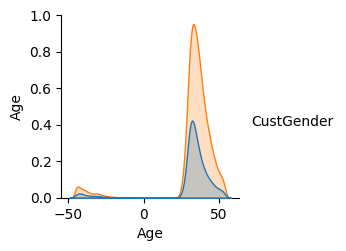

In [ ]:
sns.pairplot(bank_df,hue='CustGender',vars=['Age'])
plt.show()

In [ ]:
# 将小于0的年龄值与100相减，并更新Age列
bank_df.loc[bank_df['Age'] < 0, 'Age'] = 100 + bank_df['Age']

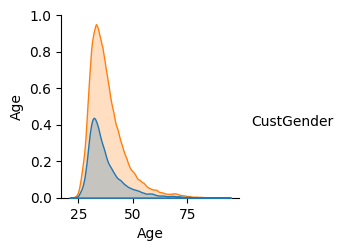

In [ ]:
sns.pairplot(bank_df,hue='CustGender',vars=['Age'])
plt.show()

In [ ]:
bank_df.isnull().sum()

In [ ]:
bank_df.nunique()

TransactionID              984068
CustomerID                 838181
CustomerDateOfBirth         16978
CustGender                      2
CustLocation                 8156
CustAccountBalance         152583
TransactionDate                55
TransactionTime             81327
TransactionAmount (INR)     86687
TransactionTime_new         73729
Hour                           23
YearOfBirth                    71
Age                            71
dtype: int64

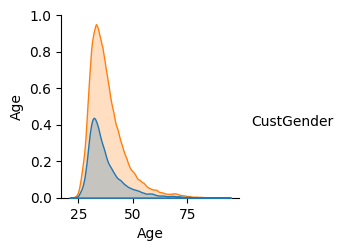

In [ ]:
sns.pairplot(bank_df,hue='CustGender',vars=['Age'])
plt.show()

In [ ]:
bank_df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR),Hour,YearOfBirth,Age,KMeans_Cluster
count,9.840680e+05,984068.000000,9.840680e+05,984068.000000,984068.000000,984068.000000,984068.000000
mean,1.044484e+05,157493.521366,1.451509e+03,15.738097,1990.447047,38.026965,0.205353
std,7.344123e+05,51195.004519,6.139664e+03,4.659660,17.782668,8.693583,0.404422
min,0.000000e+00,100.000000,0.000000e+00,1.000000,1969.000000,23.000000,0.000000
25%,4.583380e+03,124258.000000,1.510000e+02,12.000000,1983.000000,32.000000,0.000000
50%,1.600466e+04,164639.000000,4.310000e+02,16.000000,1988.000000,36.000000,0.000000
75%,5.375785e+04,200155.000000,1.125000e+03,20.000000,1992.000000,41.000000,0.000000
max,1.150355e+08,235959.000000,1.560035e+06,23.000000,2068.000000,93.000000,2.000000


In [ ]:
# 计算90%和10%分位数
balance_threshold = bank_df['CustAccountBalance'].quantile(0.9)
time_threshold = bank_df['TransactionAmount (INR)'].quantile(0.9)

# 根据阈值筛选数据
bank_df = bank_df[(bank_df['CustAccountBalance'] < balance_threshold) & (bank_df['TransactionAmount (INR)'] < time_threshold)]


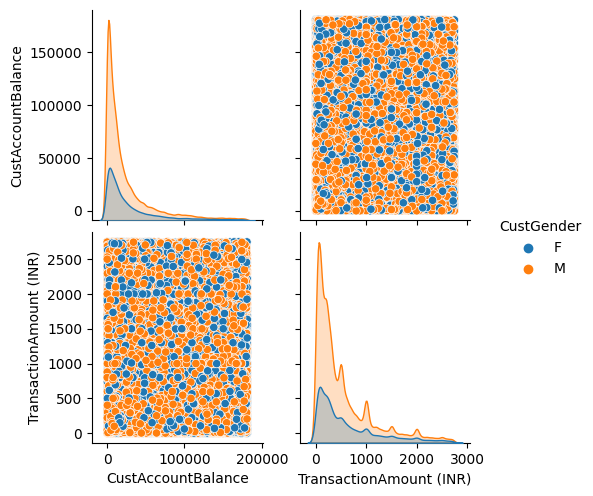

In [ ]:
sns.pairplot(bank_df,hue='CustGender',vars=['CustAccountBalance','TransactionAmount (INR)'])
plt.show()

In [ ]:
bank_df = bank_df.drop_duplicates()
bank_df.shape

(984068, 13)

In [ ]:
bank_df.to_csv('/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/Q6/bank_df_new.csv')

In [ ]:
bank_df.head()

,TransactionID,CustomerID,CustomerDateOfBirth,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionTime_new,Hour,YearOfBirth,Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2002-08-16,143207,25.0,1900-01-01 14:32:07,14,1994,29
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2002-08-16,141858,27999.0,1900-01-01 14:18:58,14,2057,66
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2002-08-16,142712,459.0,1900-01-01 14:27:12,14,1996,27
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2002-08-16,142714,2060.0,1900-01-01 14:27:14,14,1973,50
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2002-08-16,181156,1762.5,1900-01-01 18:11:56,18,1988,35


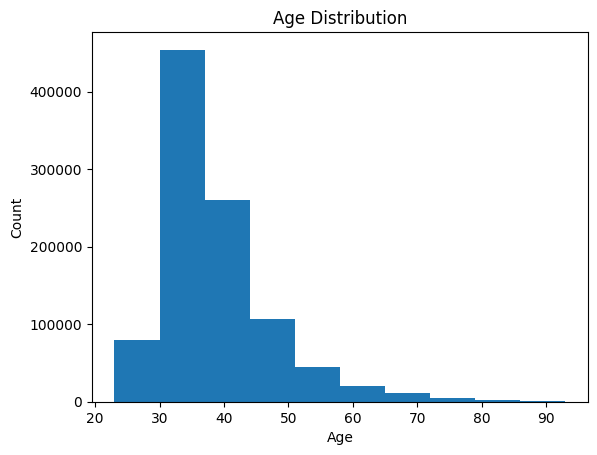

In [ ]:
import matplotlib.pyplot as plt

# 绘制年龄分布柱状图
plt.hist(bank_df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

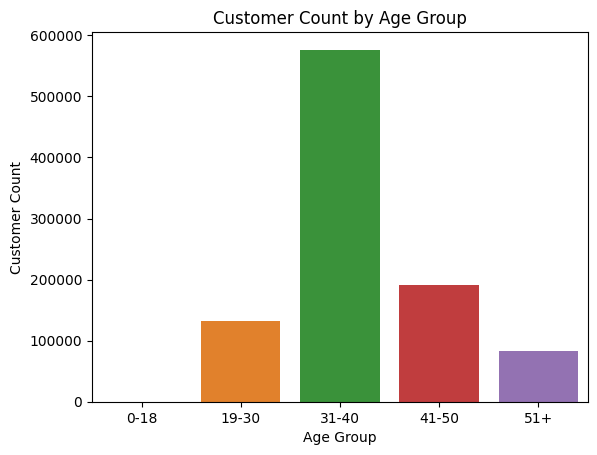

In [ ]:
import seaborn as sns

# 将年龄分段
age_bins = [0, 18, 30, 40, 50, 100]
age_labels = ['0-18', '19-30', '31-40', '41-50', '51+']
bank_df['AgeGroup'] = pd.cut(bank_df['Age'], bins=age_bins, labels=age_labels)

# 统计不同年龄段的客户数量
age_group_counts = bank_df['AgeGroup'].value_counts().sort_index()

# 绘制条形图
sns.barplot(x=age_group_counts.index, y=age_group_counts)
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.title('Customer Count by Age Group')
plt.show()

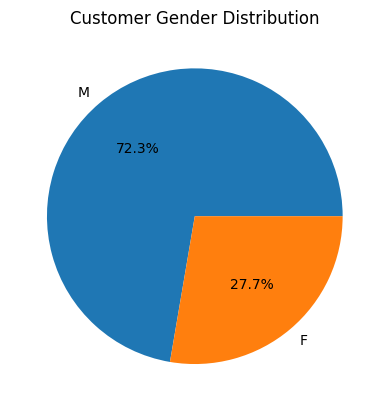

In [ ]:
import matplotlib.pyplot as plt

# 统计不同性别的客户数量
gender_counts = bank_df['CustGender'].value_counts()

# 绘制饼图
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Customer Gender Distribution')
plt.show()

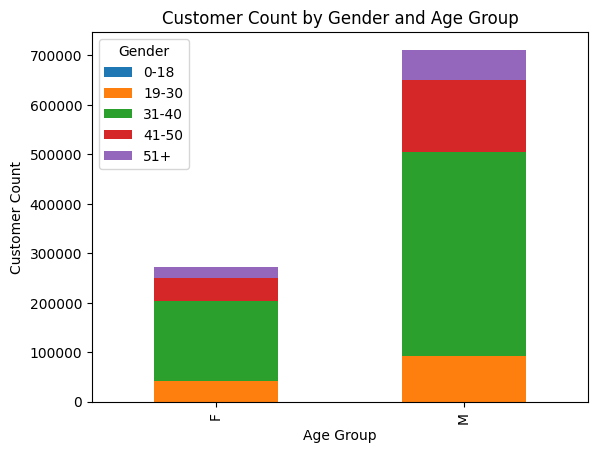

In [ ]:
import seaborn as sns

# 统计不同性别和年龄段的客户数量
gender_age_counts = bank_df.groupby(['CustGender', 'AgeGroup']).size().unstack()

# 绘制堆叠柱状图
gender_age_counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.title('Customer Count by Gender and Age Group')
plt.legend(title='Gender')
plt.show()

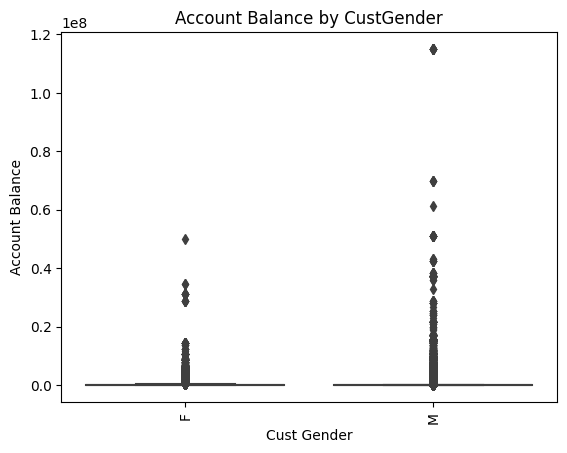

In [ ]:
import seaborn as sns

# 绘制不同性别客户的账户余额箱线图
sns.boxplot(x='CustGender', y='CustAccountBalance', data=bank_df)
plt.xlabel('Cust Gender')
plt.ylabel('Account Balance')
plt.title('Account Balance by CustGender')
plt.xticks(rotation=90)
plt.show()

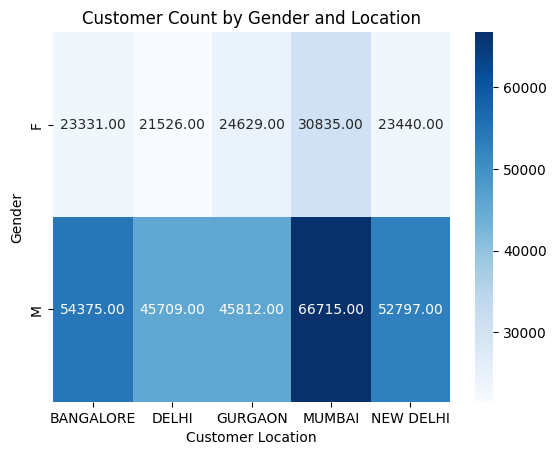

In [ ]:
# 绘制热力图
import seaborn as sns
# 按地区分类并获取金额最多的前5个地区
top_5_locations = bank_df['CustLocation'].value_counts().nlargest(5).index
# 统计不同性别和地区的客户数量
gender_location_counts = bank_df[bank_df['CustLocation'].isin(top_5_locations)].groupby(['CustGender', 'CustLocation']).size().unstack()

# 绘制热力图
sns.heatmap(gender_location_counts, cmap='Blues', annot=True, fmt='.2f')
plt.xlabel('Customer Location')
plt.ylabel('Gender')
plt.title('Customer Count by Gender and Location')
plt.show()

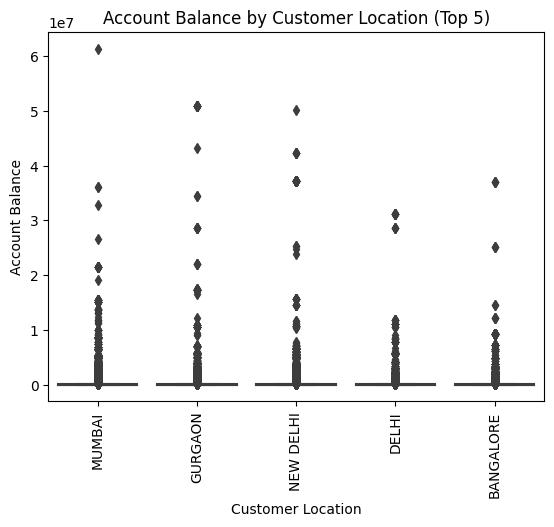

In [ ]:
import seaborn as sns

# 按地区分类并获取金额最多的前5个地区
top_5_locations = bank_df['CustLocation'].value_counts().nlargest(5).index

# 根据筛选的地区绘制箱线图
sns.boxplot(x='CustLocation', y='CustAccountBalance', data=bank_df[bank_df['CustLocation'].isin(top_5_locations)])
plt.xlabel('Customer Location')
plt.ylabel('Account Balance')
plt.title('Account Balance by Customer Location (Top 5)')
plt.xticks(rotation=90)
plt.show()

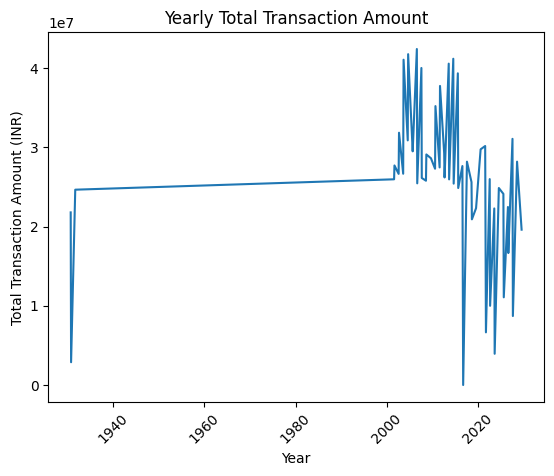

In [ ]:
import matplotlib.pyplot as plt

# 按年份统计交易总金额
yearly_transaction_amount = bank_df.groupby('TransactionDate')['TransactionAmount (INR)'].sum()

# 绘制折线图
plt.plot(yearly_transaction_amount.index, yearly_transaction_amount)
plt.xlabel('Year')
plt.ylabel('Total Transaction Amount (INR)')
plt.title('Yearly Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

2010-2029    522502
1990-2009    425313
1930-1949     18339
1950-1969         0
1970-1989         0
Name: YearGroup, dtype: int64


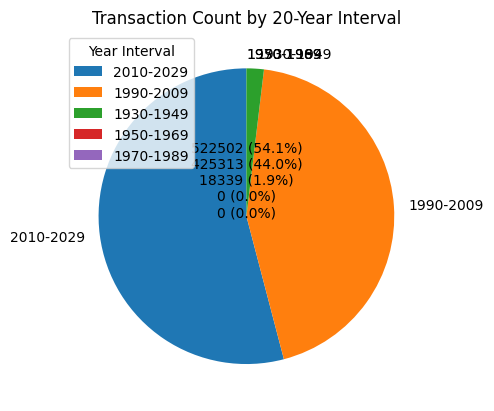

In [ ]:
# 将年份分组为20年的区间
year_bins = range(min(bank_df['TransactionDate'].dt.year), max(bank_df['TransactionDate'].dt.year) + 21, 20)
year_labels = [f"{bin}-{bin+19}" for bin in year_bins[:-1]]
bank_df['YearGroup'] = pd.cut(bank_df['TransactionDate'].dt.year, bins=year_bins, labels=year_labels)

# 统计不同年份区间的个数
year_group_counts = bank_df['YearGroup'].value_counts()
print(year_group_counts)
# 绘制饼图
plt.pie(year_group_counts, labels=year_group_counts.index, autopct='', startangle=90)
plt.title('Transaction Count by 20-Year Interval')
plt.legend(title='Year Interval', loc='upper left')

# 添加标注
total_count = year_group_counts.sum()
label_strs = [f'{count} ({count/total_count*100:.1f}%)' for count in year_group_counts]
plt.gca().annotate('\n'.join(label_strs), xy=(0, 0), fontsize=10, ha='center')

plt.show()

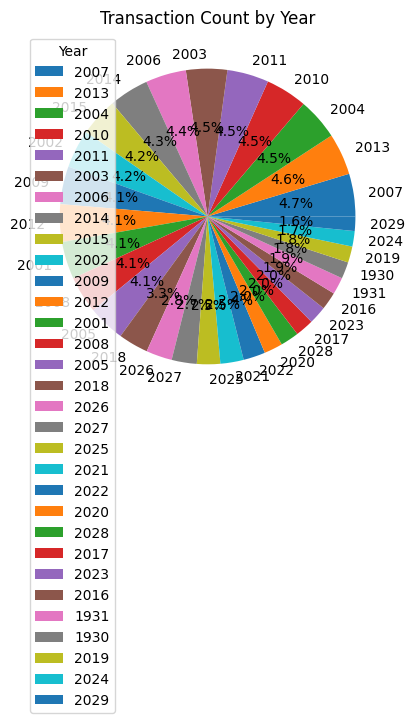

In [ ]:
# 统计不同年份的个数
year_counts = bank_df['TransactionDate'].dt.year.value_counts()

# 绘制饼图
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%')
plt.title('Transaction Count by Year')
plt.legend(title='Year', loc='upper left')
plt.show()

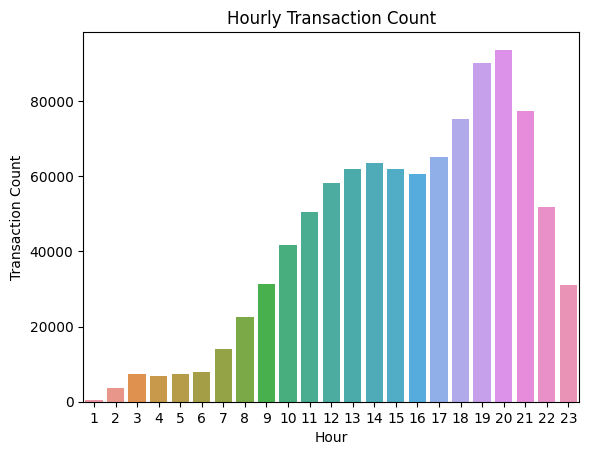

In [ ]:
import seaborn as sns

# 统计不同小时的交易数量
hourly_transaction_count = bank_df['Hour'].value_counts().sort_index()

# 绘制条形图
sns.barplot(x=hourly_transaction_count.index, y=hourly_transaction_count)
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.title('Hourly Transaction Count')
plt.show()

# clustering

In [30]:
import pandas as pd
bank_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/5002/DSAA5002_50015756_Gelin_Bian_final/Q6/bank_df_new.csv')

In [33]:
bank_df.shape

(808628, 15)

In [ ]:
# 导入所需的库
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt






K-means

In [ ]:
# 选择特征
features = ['CustAccountBalance', 'TransactionAmount (INR)', 'Age']
X = bank_df[features]

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# K-means聚类
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
# 将聚类结果添加到原始数据
bank_df['KMeans_Cluster'] = kmeans_labels




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


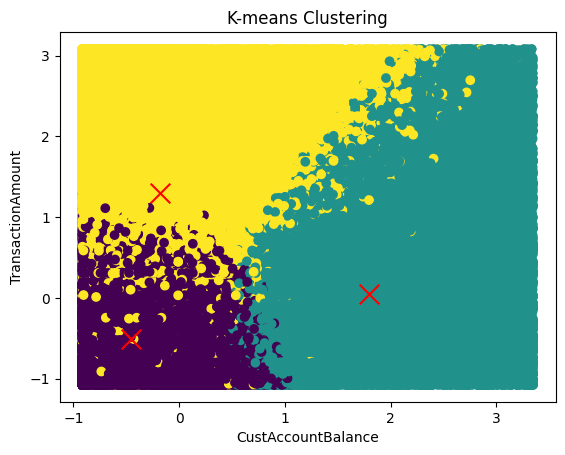

In [ ]:

# 绘制K-means聚类结果可视化
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=200)
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount')
plt.title('K-means Clustering')
plt.show()

DBSCAN

In [ ]:
import random
# 选择特征
features = ['TransactionAmount (INR)', 'Age']
X = bank_df[features]
# 随机抽取10%的数据
sample_size = int(0.01 * len(X))
random_indices = random.sample(range(len(X)), sample_size)
X_sampled = X.iloc[random_indices]

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

In [ ]:
# DBSCAN聚类
dbscan = DBSCAN(eps=0.1, min_samples=100)
dbscan_labels = dbscan.fit_predict(X_scaled)




In [ ]:
import numpy as np

unique_labels = np.unique(dbscan_labels)
num_unique_labels = len(unique_labels)

print("Number of unique labels:", num_unique_labels)

Number of unique labels: 11


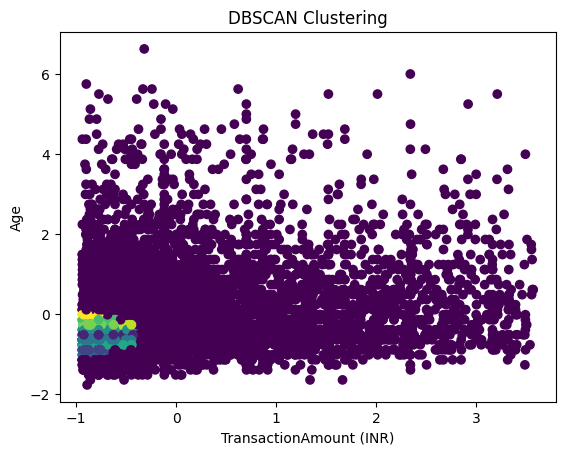

In [ ]:
# 绘制散点图
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.xlabel('TransactionAmount (INR)')
plt.ylabel('Age')
plt.title('DBSCAN Clustering')
plt.show()

AgglomerativeClustering

In [ ]:
import random
# 选择特征
features = ['CustAccountBalance', 'Age']
X = bank_df[features]
# 随机抽取10%的数据
sample_size = int(0.1 * len(X))
random_indices = random.sample(range(len(X)), sample_size)
X_sampled = X.iloc[random_indices]

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)



In [ ]:
# 层次聚类
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)


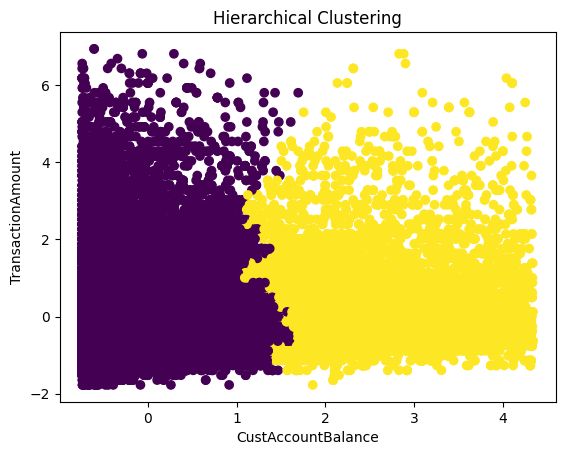

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount')
plt.title('Hierarchical Clustering')
plt.show()